In [42]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [43]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [44]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [45]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## Create Own Model

## iPhone13_I

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv', header=False)

[0.015625 +0.015625j  0.       +0.j        0.0078125+0.j        ...
 0.0234375+0.0078125j 0.0234375+0.0078125j 0.03125  -0.0078125j]
2048
77387
(2048, 77387)
[0.01826616 0.00950806 0.00373913 ... 0.00167015 0.00381105 0.00957042]
(10000, 2048)
(10000,)
[0.0078125+0.015625j  0.0078125+0.j        0.015625 +0.j        ...
 0.015625 +0.0234375j 0.015625 +0.j        0.015625 +0.j       ]
2048
81265
(2048, 81265)
[0.01835838 0.00961773 0.00350257 ... 0.00192106 0.00369137 0.00963282]
(20000, 2048)
(20000,)
[0.03125  +0.015625j  0.03125  +0.0078125j 0.015625 +0.0078125j ...
 0.0234375+0.015625j  0.0234375+0.0078125j 0.015625 -0.0078125j]
2048
82947
(2048, 82947)
[0.01815592 0.00944388 0.00397235 ... 0.00185365 0.0036876  0.00957425]
(30000, 2048)
(30000,)
[0.       +0.03125j  0.       +0.j       0.015625 +0.j       ...
 0.015625 -0.015625j 0.0234375+0.015625j 0.0078125+0.015625j]
2048
82654
(2048, 82654)
[0.01825963 0.00967498 0.00359683 ... 0.00195847 0.00358379 0.01038325]
(40000, 2048)
(40

Build a model for iPhone13_I

In [6]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

2023-02-05 13:41:24.401145: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [8]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [9]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 53s 20ms/step - loss: 2.0100 - accuracy: 0.5209 - val_loss: 1.5027 - val_accuracy: 0.8700
Epoch 2/25
2532/2532 [==============================] - 35s 14ms/step - loss: 0.9590 - accuracy: 0.9410 - val_loss: 0.5352 - val_accuracy: 0.9861
Epoch 3/25
2532/2532 [==============================] - 30s 12ms/step - loss: 0.2920 - accuracy: 0.9969 - val_loss: 0.1374 - val_accuracy: 0.9987
Epoch 4/25
2532/2532 [==============================] - 32s 12ms/step - loss: 0.0818 - accuracy: 0.9992 - val_loss: 0.0519 - val_accuracy: 0.9993
Epoch 5/25
2532/2532 [==============================] - 29s 11ms/step - loss: 0.0372 - accuracy: 0.9995 - val_loss: 0.0267 - val_accuracy: 0.9997
Epoch 6/25
2532/2532 [==============================] - 29s 11ms/step - loss: 0.0234 - accuracy: 0.9996 - val_loss: 0.0182 - val_accuracy: 0.9997
Epoch 7/25
2532/2532 [==============================] - 32s 13ms/step - loss: 0.0174 - accuracy: 0.9997 - val_loss: 0.0136 -

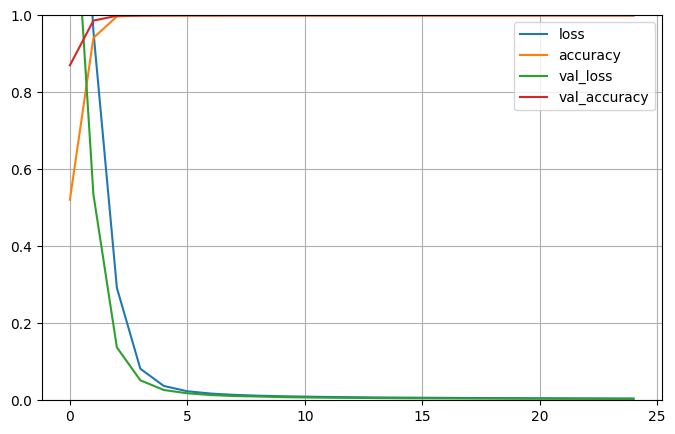

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the own iPhone13_I model

In [11]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

In [12]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 4s 11ms/step - loss: 0.0068 - accuracy: 0.9997
test loss, test acc: [0.006844175513833761, 0.9997000098228455]


In [13]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    1    0    0    0]
 [   0    0  993    0    0    0    0    0    0    0]
 [   1    0    0  938    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   1    0    0    0    0    0  998    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

In [15]:
model.save("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

Test Accuracy:0.9997


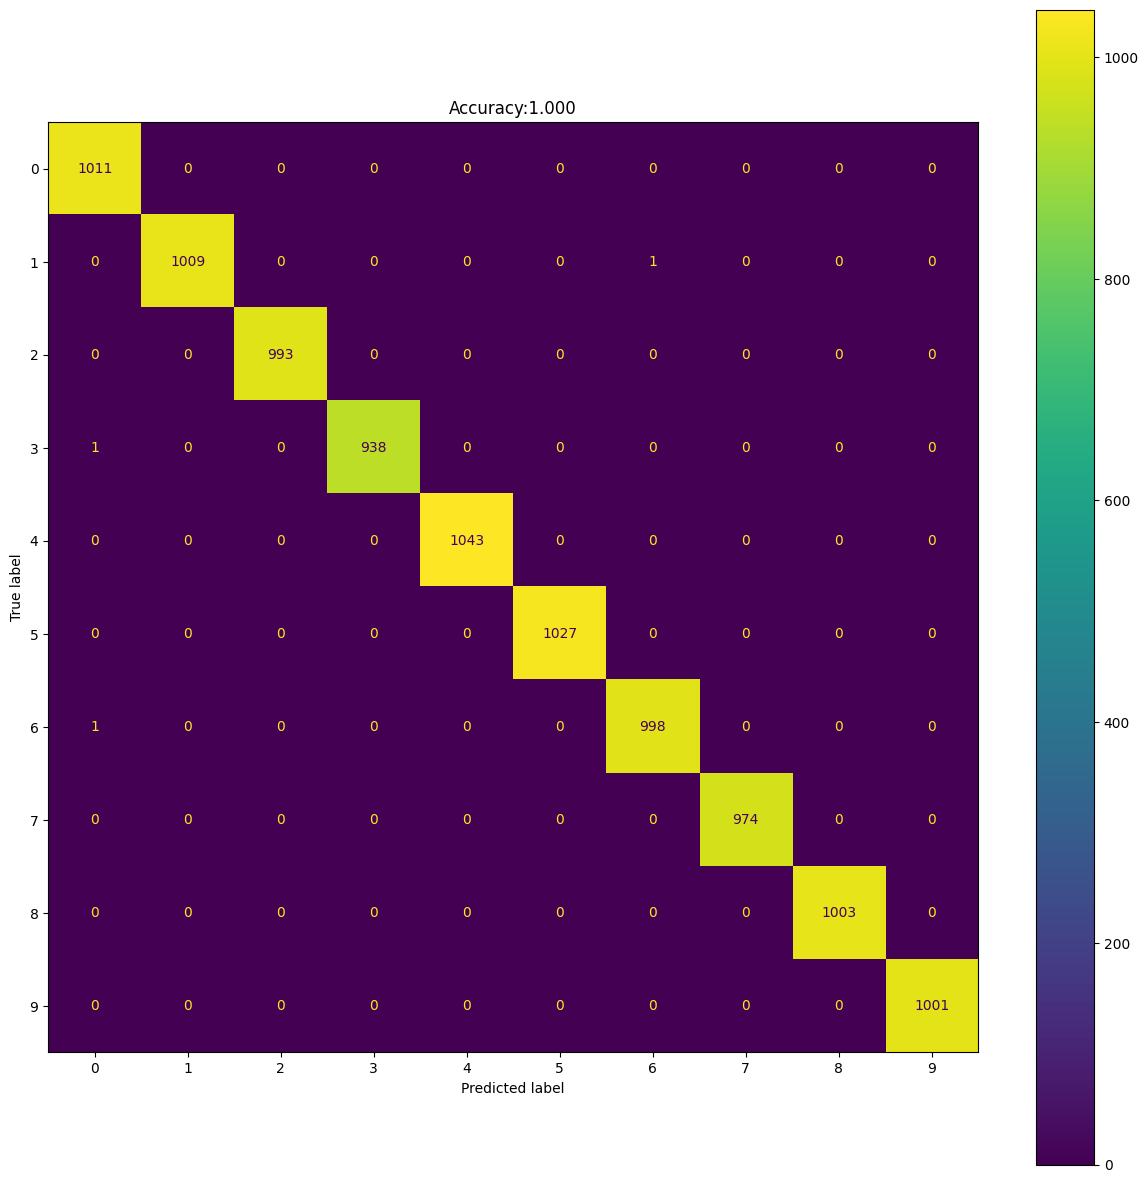

In [16]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_I_confusion_matrix.pdf')

## iPhone13_II

In [26]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv', header=False)

[ 0.078125 +0.09375j    0.5625   -0.8046875j -0.984375 +0.9921875j ...
  0.015625 +0.015625j   0.0078125-0.0078125j  0.015625 +0.015625j ]
2048
81191
(2048, 81191)
[0.03497613 0.0617279  0.03110138 ... 0.02998163 0.05360715 0.04346049]
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.03125  +0.0078125j 0.0078125+0.015625j  ...
 0.0078125+0.0078125j 0.0234375+0.0078125j 0.015625 +0.j       ]
2048
72123
(2048, 72123)
[0.0184771  0.00980769 0.00377408 ... 0.00184979 0.00378497 0.00949242]
(20000, 2048)
(20000,)
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.0078125j]
2048
92893
(2048, 92893)
[0.01809648 0.00941779 0.00405625 ... 0.00197094 0.00359252 0.00953348]
(30000, 2048)
(30000,)
[-0.0078125-0.0078125j  0.0234375-0.0078125j  0.0234375+0.j        ...
  0.03125  +0.0078125j  0.015625 +0.0078125j  0.03125  +0.j       ]
2048
56322
(2048, 56322)
[0.01820297 0.00946224 0.00370945 ... 0.00208693 0.00383636 0.00951074]

Build iPhone13_II Model

In [18]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [21]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 27s 11ms/step - loss: 1.8835 - accuracy: 0.5518 - val_loss: 1.1979 - val_accuracy: 0.9374
Epoch 2/25
2532/2532 [==============================] - 29s 12ms/step - loss: 0.5987 - accuracy: 0.9843 - val_loss: 0.2577 - val_accuracy: 0.9988
Epoch 3/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.1375 - accuracy: 0.9988 - val_loss: 0.0914 - val_accuracy: 0.9988
Epoch 4/25
2532/2532 [==============================] - 27s 11ms/step - loss: 0.0584 - accuracy: 0.9990 - val_loss: 0.0576 - val_accuracy: 0.9989
Epoch 5/25
2532/2532 [==============================] - 29s 12ms/step - loss: 0.0401 - accuracy: 0.9992 - val_loss: 0.0462 - val_accuracy: 0.9991
Epoch 6/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.0325 - accuracy: 0.9992 - val_loss: 0.0394 - val_accuracy: 0.9992
Epoch 7/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.0280 - accuracy: 0.9993 - val_loss: 0.0347 -

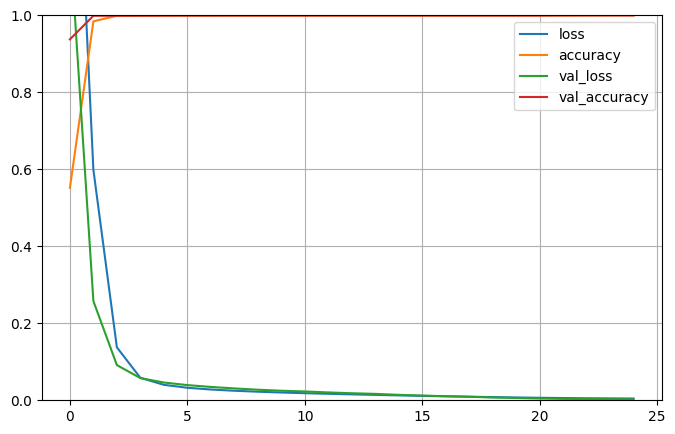

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the Own iPhone13_II Model

In [23]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")

In [24]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.9998
test loss, test acc: [0.004553168546408415, 0.9998000264167786]


In [25]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    0  992    0    0    0    0    0    0    1]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    1    0    0    0 1002    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9998


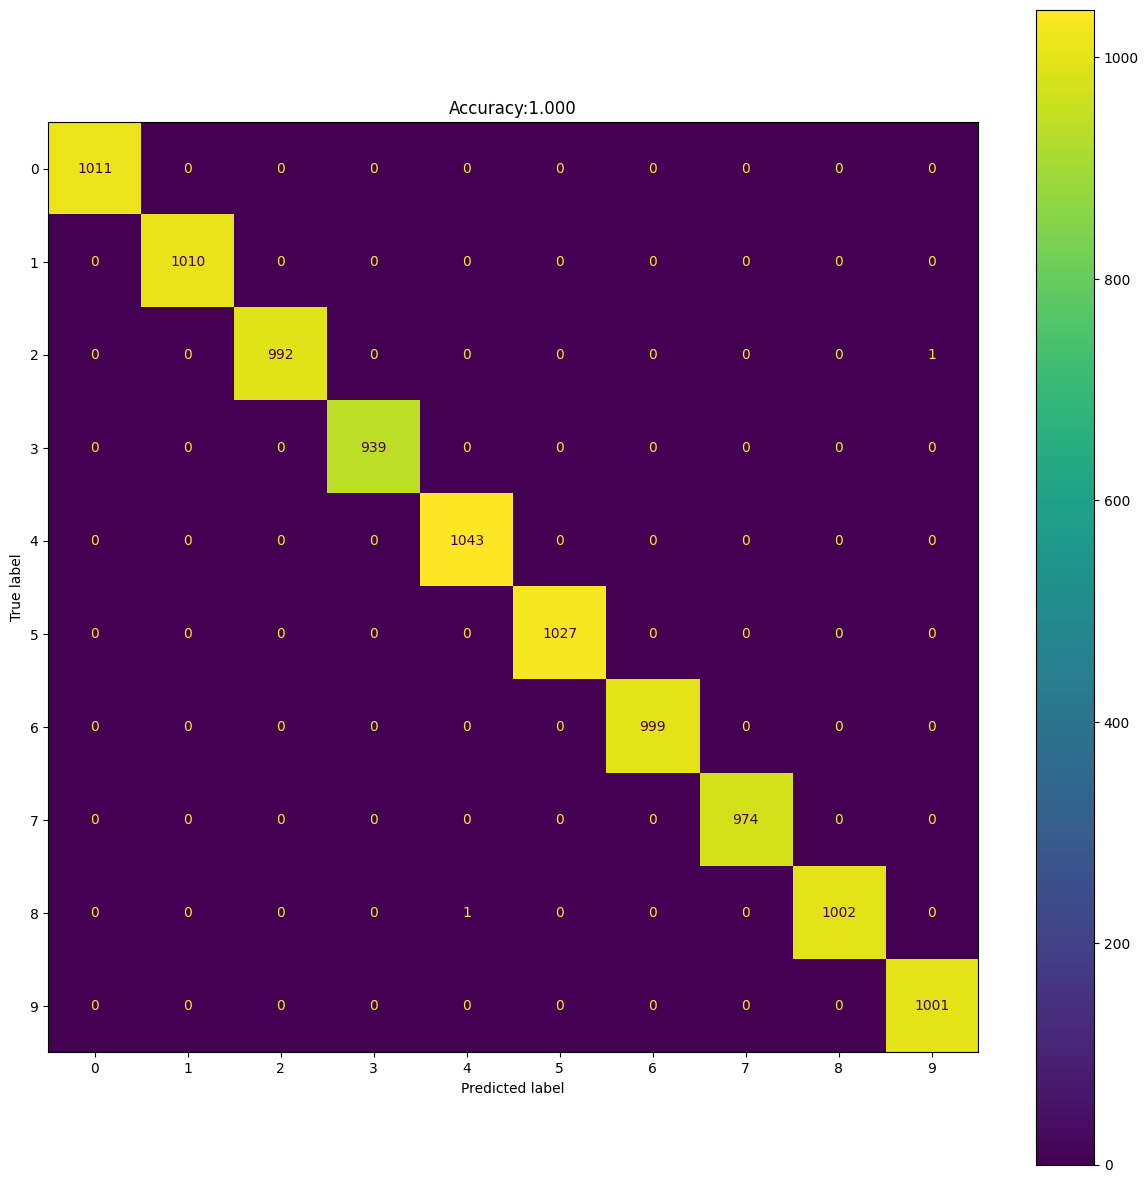

In [27]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_III

In [46]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_III/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv', header=False)

[0.015625 +0.j        0.015625 +0.0078125j 0.0234375+0.015625j  ...
 0.       +0.j        0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
78558
(2048, 78558)
[0.01852033 0.00958475 0.00369698 ... 0.00181086 0.003753   0.00963692]
0
(10000, 2048)
(10000,)
[0.015625 +0.0234375j 0.0078125+0.j        0.0234375+0.j        ...
 0.03125  +0.0078125j 0.0078125+0.015625j  0.0078125+0.0234375j]
2048
74243
(2048, 74243)
[0.01901824 0.00952496 0.00361272 ... 0.00181022 0.00350893 0.00955064]
1
(20000, 2048)
(20000,)
[0.0234375+0.j        0.0234375+0.0234375j 0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.0078125j]
2048
79732
(2048, 79732)
[0.01835802 0.00962685 0.00344502 ... 0.00159603 0.00344605 0.00971396]
2
(30000, 2048)
(30000,)
[0.015625 +0.j        0.0234375+0.0078125j 0.0078125+0.015625j  ...
 0.       -0.0078125j 0.015625 -0.0078125j 0.03125  +0.0078125j]
2048
72926
(2048, 72926)
[0.01814387 0.00948817 0.00355478 ... 0.00184933 0.0035476  0.0094812 ]
3
(40

Build an own model for iPhone13_III

In [30]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [32]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [33]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 34s 13ms/step - loss: 1.8822 - accuracy: 0.4956 - val_loss: 1.1336 - val_accuracy: 0.8949
Epoch 2/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.5316 - accuracy: 0.9782 - val_loss: 0.2083 - val_accuracy: 0.9948
Epoch 3/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.1225 - accuracy: 0.9967 - val_loss: 0.0816 - val_accuracy: 0.9976
Epoch 4/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0614 - accuracy: 0.9980 - val_loss: 0.0544 - val_accuracy: 0.9979
Epoch 5/25
2532/2532 [==============================] - 24s 9ms/step - loss: 0.0442 - accuracy: 0.9981 - val_loss: 0.0436 - val_accuracy: 0.9980
Epoch 6/25
2532/2532 [==============================] - 24s 10ms/step - loss: 0.0360 - accuracy: 0.9982 - val_loss: 0.0373 - val_accuracy: 0.9980
Epoch 7/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0307 - accuracy: 0.9983 - val_loss: 0.0327 - val

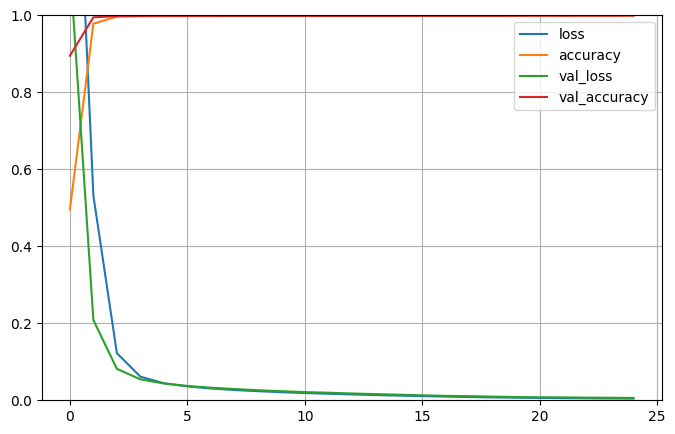

<Figure size 1500x1500 with 0 Axes>

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/accuracy_and_loss_iPhone13_III.pdf')

Test the own iPhone_III Model

In [35]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")

In [36]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0077 - accuracy: 0.9989
test loss, test acc: [0.007747766096144915, 0.9988999962806702]


In [37]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1010    1    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    2  991    0    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    1    0    0 1042    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    2  972    0    0]
 [   0    0    0    0    0    0    1    1  998    3]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9989


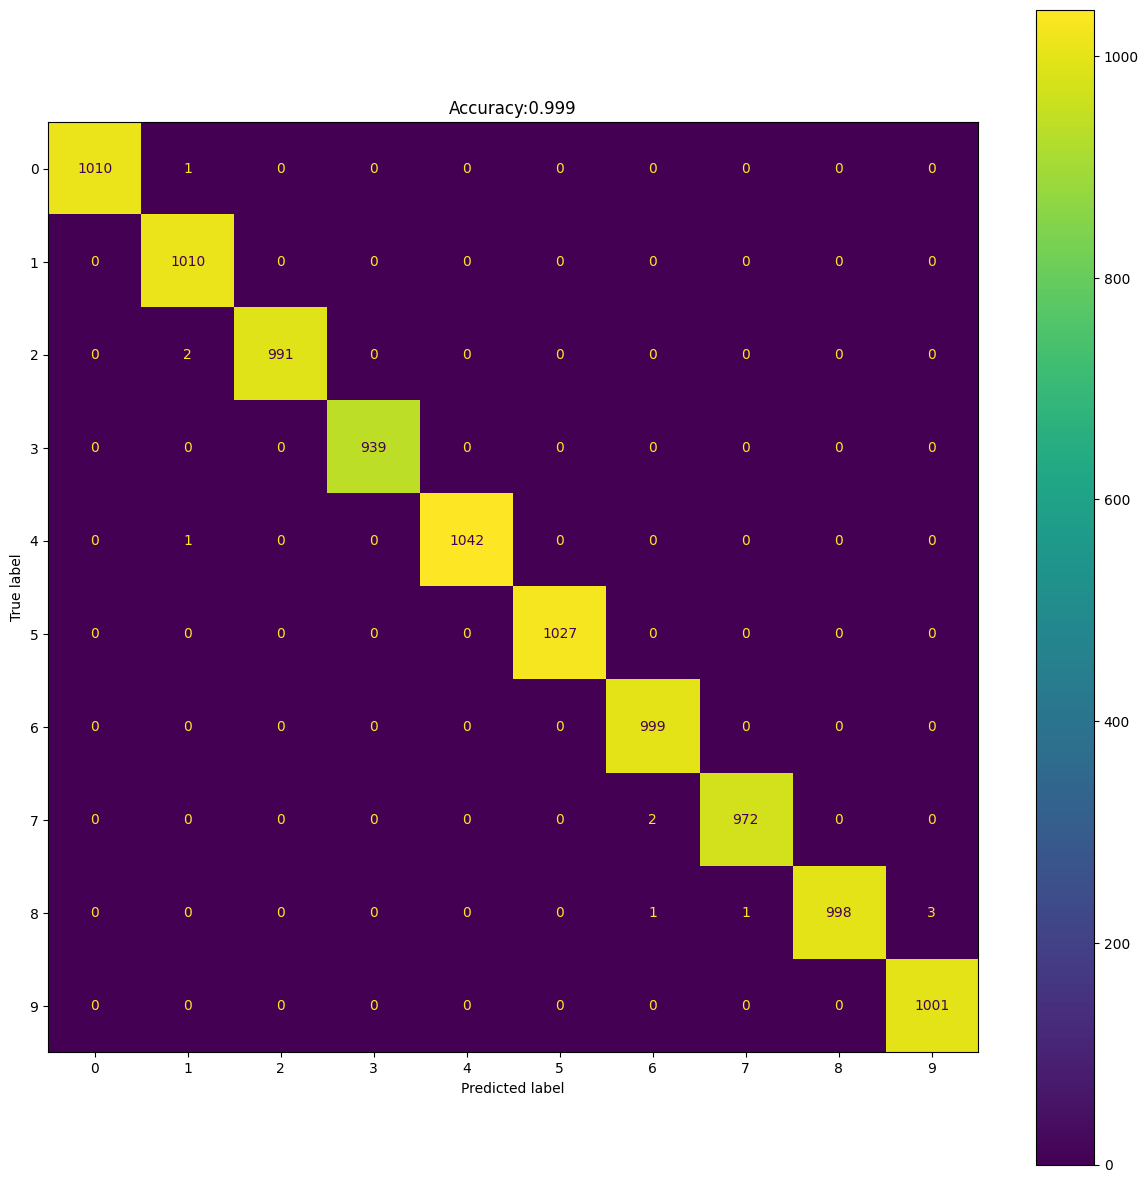

In [39]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

## Cross-check the same Model without split the dataset as training and testing

iPhone13_I

In [6]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

2023-02-06 14:43:38.985808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 0.0046 - accuracy: 0.9998
test loss, test acc: [0.0045880828984081745, 0.9998000264167786]


In [8]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[0 0 0 ... 9 9 9]
0


In [9]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[10000     0     0     0     0     0     0     0     0     0]
 [    0  9998     0     0     0     0     2     0     0     0]
 [    3     0  9997     0     0     0     0     0     0     0]
 [    1     2     0  9996     1     0     0     0     0     0]
 [    1     0     0     0  9999     0     0     0     0     0]
 [    0     2     0     0     0  9996     2     0     0     0]
 [    3     0     0     0     0     0  9997     0     0     0]
 [    1     1     0     0     0     0     0  9998     0     0]
 [    1     0     0     0     0     0     0     0  9999     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00 

Test Accuracy:0.9998


Text(0.5, 1.0, 'Accuracy:1.000')

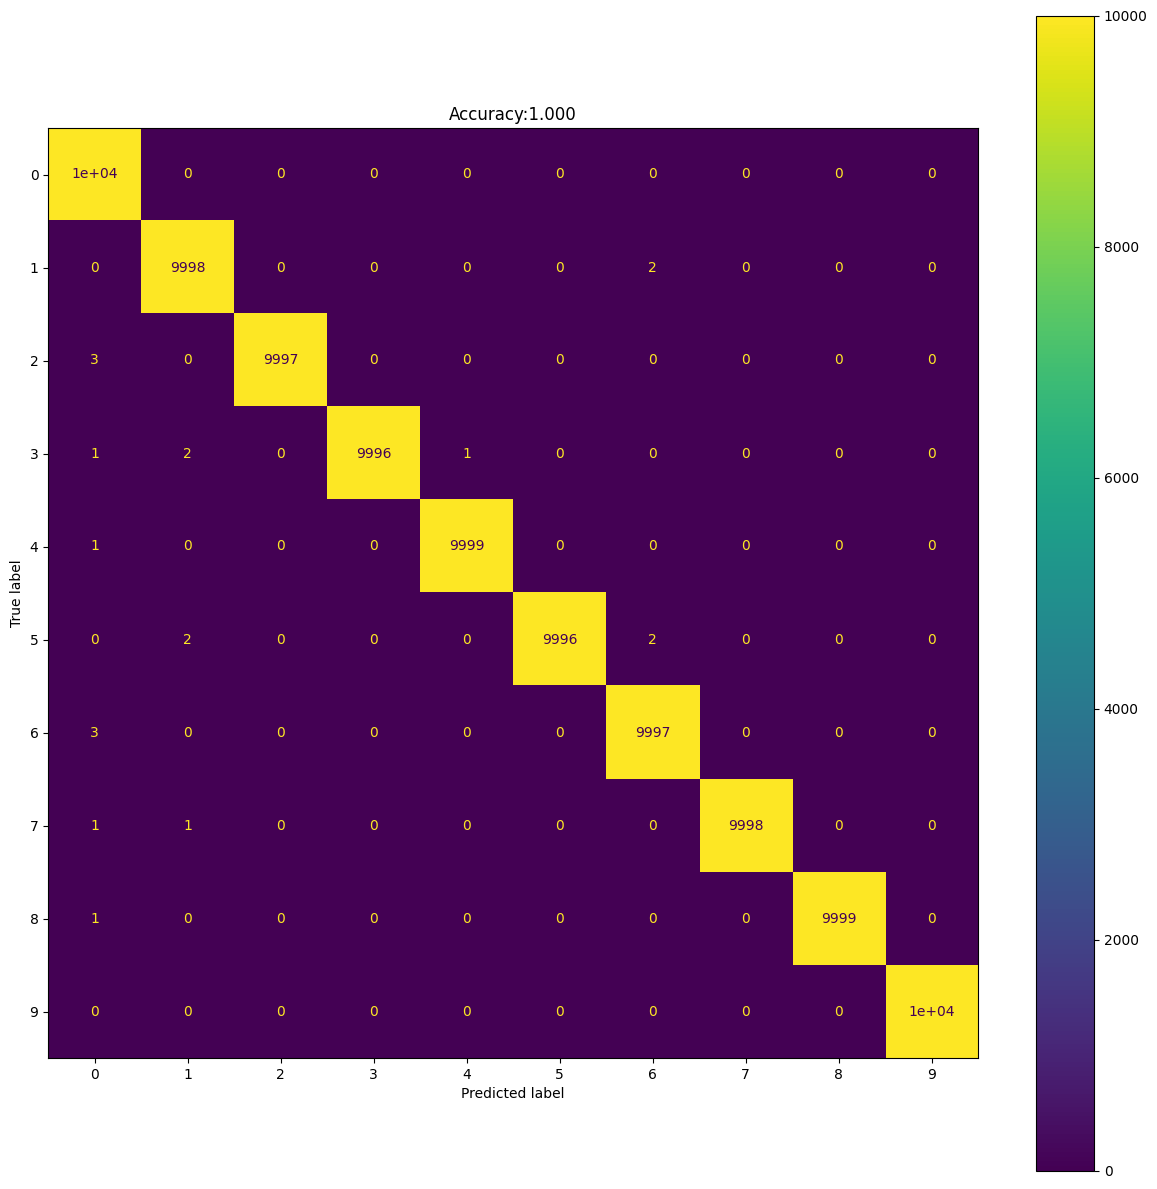

In [11]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_II

In [27]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")

In [28]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 18s 6ms/step - loss: 0.0042 - accuracy: 0.9998
test loss, test acc: [0.00421344768255949, 0.9997699856758118]


In [29]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[4 4 4 ... 9 9 9]
4


In [30]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9995     0     0     0     5     0     0     0     0     0]
 [    0 10000     0     0     0     0     0     0     0     0]
 [    0     0  9995     1     1     0     0     2     0     1]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0     0     0     0 10000     0     0     0     0     0]
 [    0     0     0     0     1  9998     1     0     0     0]
 [    0     0     0     0     2     1  9996     0     0     1]
 [    0     1     0     0     0     0     0  9998     0     1]
 [    0     0     0     0     2     0     0     0  9998     0]
 [    0     0     0     0     1     0     0     2     0  9997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00 

Test Accuracy:0.99977


Text(0.5, 1.0, 'Accuracy:1.000')

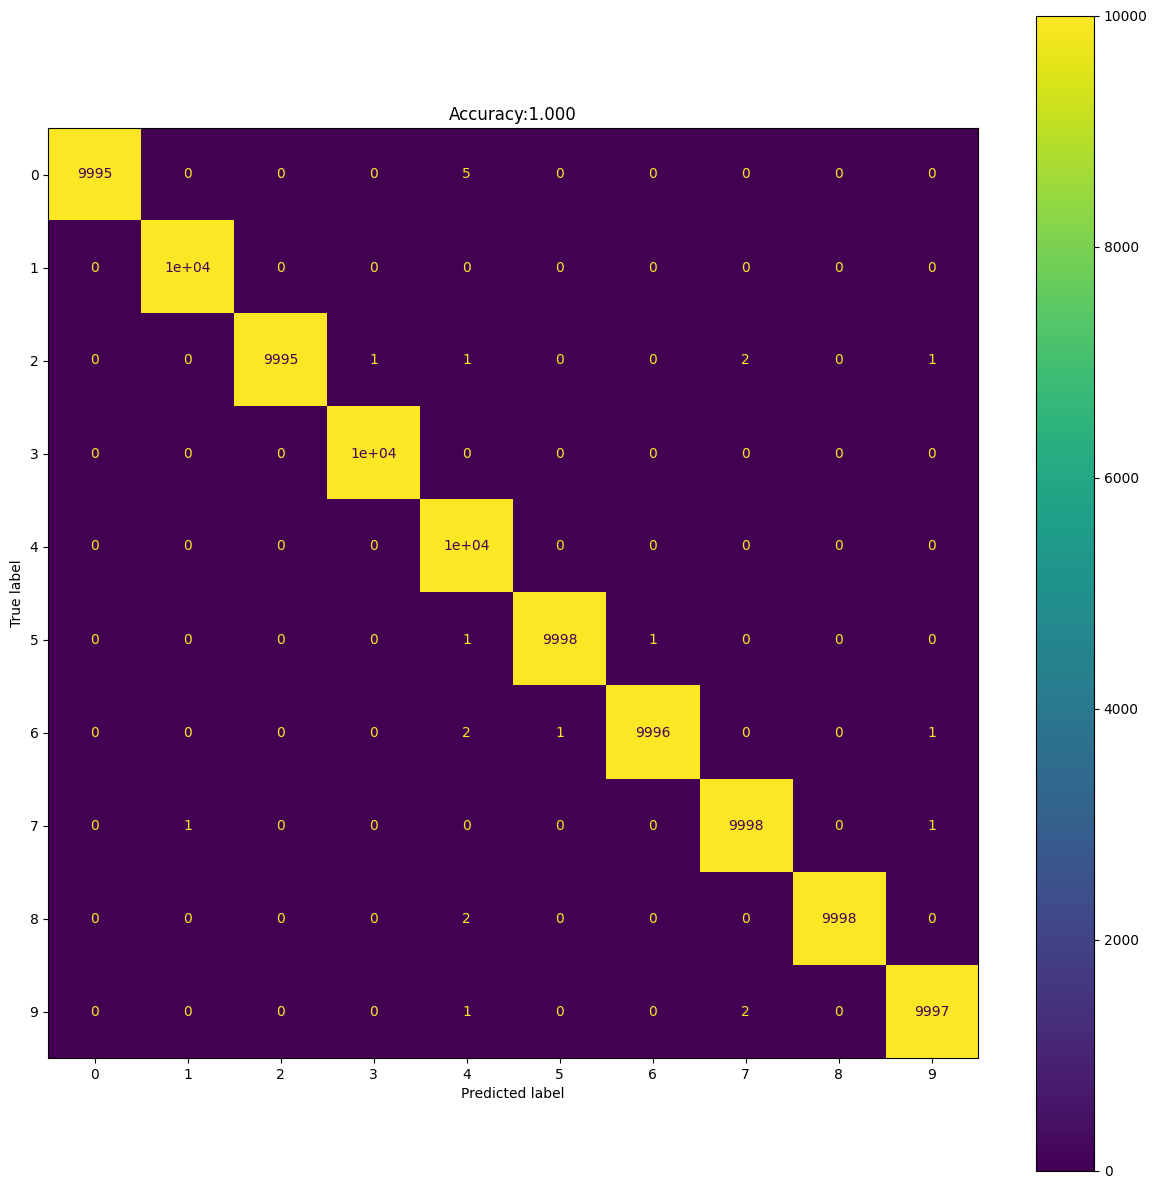

In [31]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_III

In [47]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")

In [48]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 24s 8ms/step - loss: 0.0047 - accuracy: 0.9994
test loss, test acc: [0.00473962165415287, 0.9993900060653687]


In [49]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 15s 5ms/step
[0 0 0 ... 9 9 9]
0


In [50]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9998     2     0     0     0     0     0     0     0     0]
 [    0 10000     0     0     0     0     0     0     0     0]
 [    2     7  9990     0     0     0     0     0     0     1]
 [    0     0     0  9990     1     0     8     0     0     1]
 [    0     2     0     0  9998     0     0     0     0     0]
 [    0     0     0     0     0  9992     6     0     0     2]
 [    1     1     0     0     1     0  9994     0     0     3]
 [    0     0     0     0     0     0     4  9996     0     0]
 [    0     0     0     1     1     1     6     1  9984     6]
 [    0     0     0     0     0     0     3     0     0  9997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00 

Test Accuracy:0.99939


Text(0.5, 1.0, 'Accuracy:0.999')

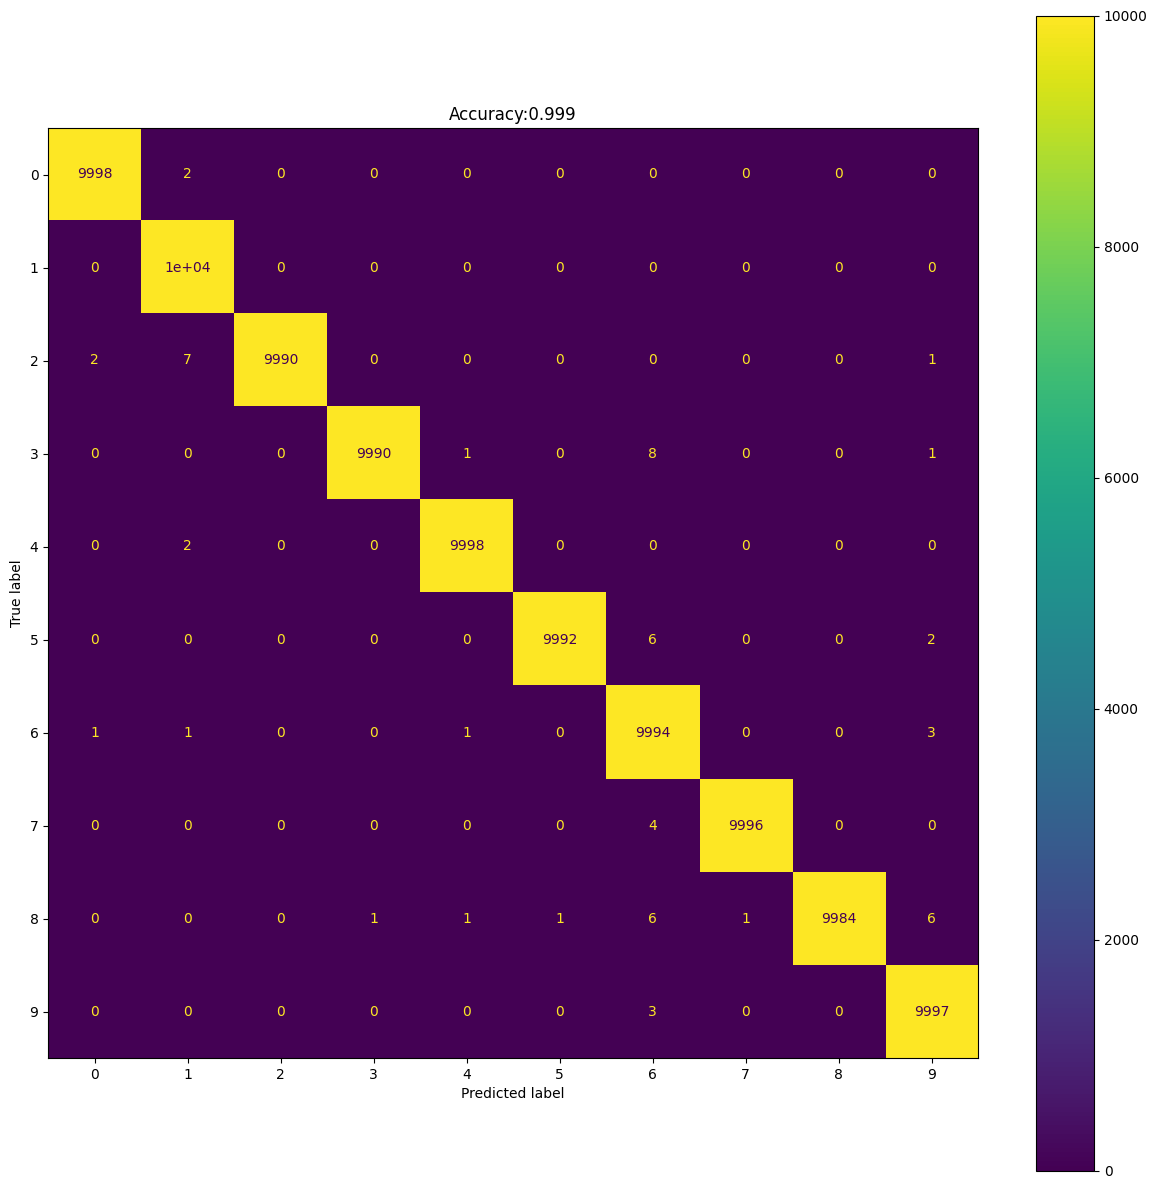

In [51]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

## Testing Cross Models

iPhone13_model_II to iPhone13_I Device

In [12]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")

In [13]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 7.0076 - accuracy: 0.0938
test loss, test acc: [7.007595539093018, 0.09380000084638596]


In [14]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 15s 5ms/step
[4 4 4 ... 0 0 0]
4


In [15]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[    0     0     0     0  9972     0     0     0     0    28]
 [    0  1550     0     0     1  6411     1     1  1724   312]
 [    0  1733     0     0     2  6215   123     1    35  1891]
 [    0     1  8363     0     1  1461   173     0     0     1]
 [    0  1153     0     0     1  7125     1     0  1710    10]
 [    0  2589     0     2     2  5265     1     1  2117    23]
 [    0     0     0     0  9934     0     0     1    17    48]
 [    0     1     0  7640     1     0     1  2357     0     0]
 [    0  9655     0    45     1    91     0     0   207     1]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.09      0.15      0.12     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.20      0.53      0.29 

Test Accuracy:0.0938


Text(0.5, 1.0, 'Accuracy:0.094')

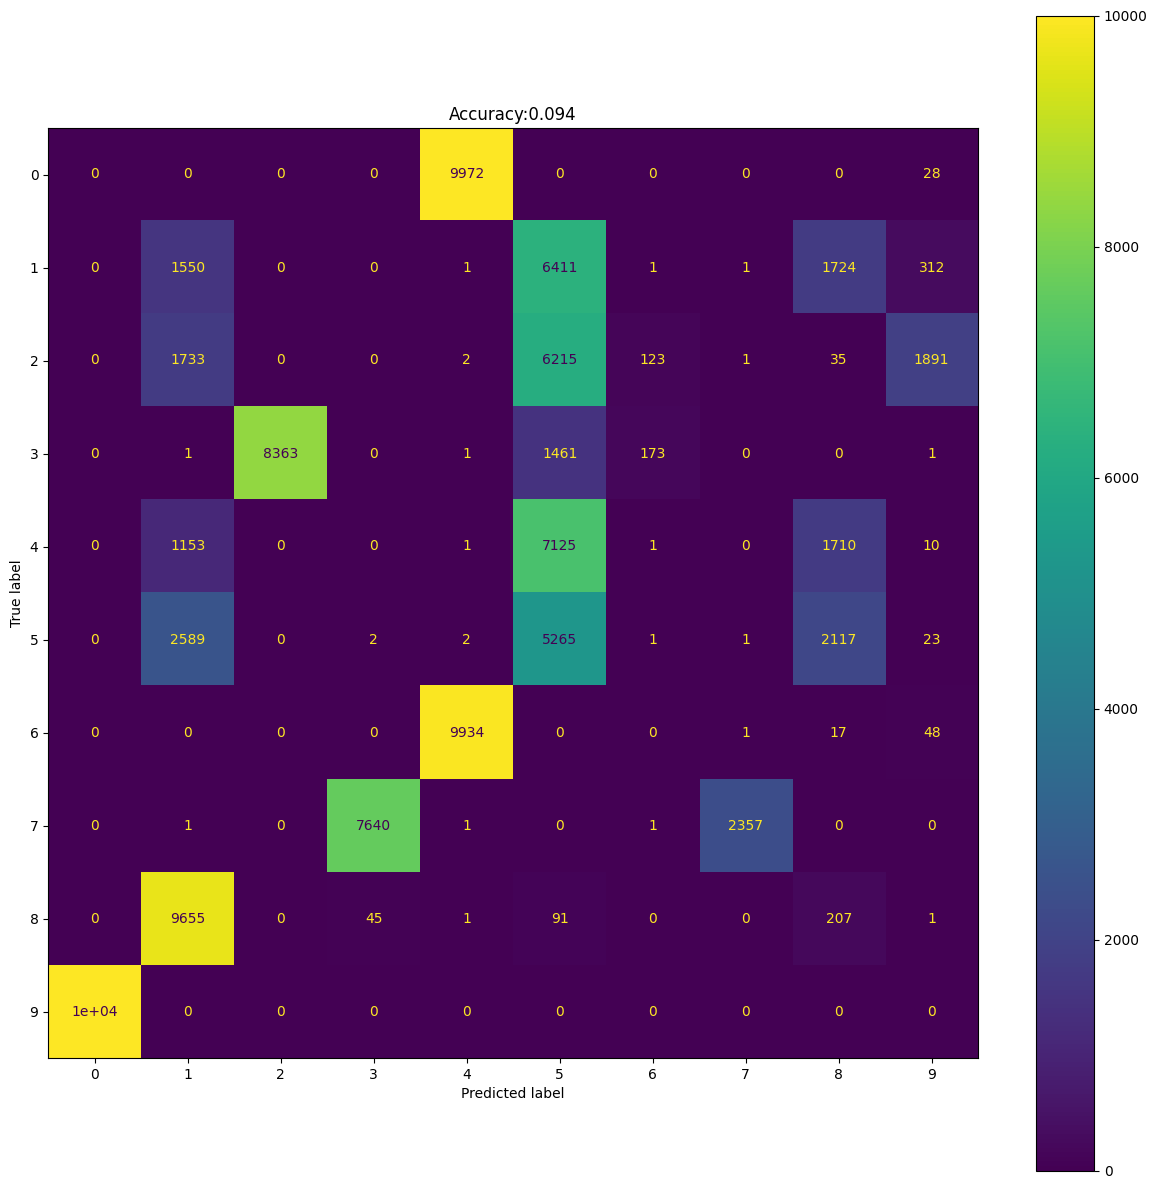

In [16]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_model_III to iPhone13_I Device

In [17]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")

In [18]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 15.6290 - accuracy: 0.1010
test loss, test acc: [15.628994941711426, 0.10098999738693237]


In [19]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 13s 4ms/step
[7 8 8 ... 7 7 7]
7


In [20]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[    0     0     1     2     0     0  3700   257  6040     0]
 [    0     0     0     0     0     1     9     0  9989     1]
 [    0     1     0     1     0     0     7     0  9991     0]
 [    0     0     0     1     0     0     3     0  9995     1]
 [    0     0     0     2     0     1     2     0  9995     0]
 [    0     1     0     1     0     0    10     0  9987     1]
 [    0     1     0     1     0     0   104    19  9875     0]
 [    0     0     0     1     0     1     8     1  9989     0]
 [    0     1     0     0     0     0     6     0  9993     0]
 [    0     0     0     0     0     0     0 10000     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.11      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00 

Test Accuracy:0.10099


Text(0.5, 1.0, 'Accuracy:0.101')

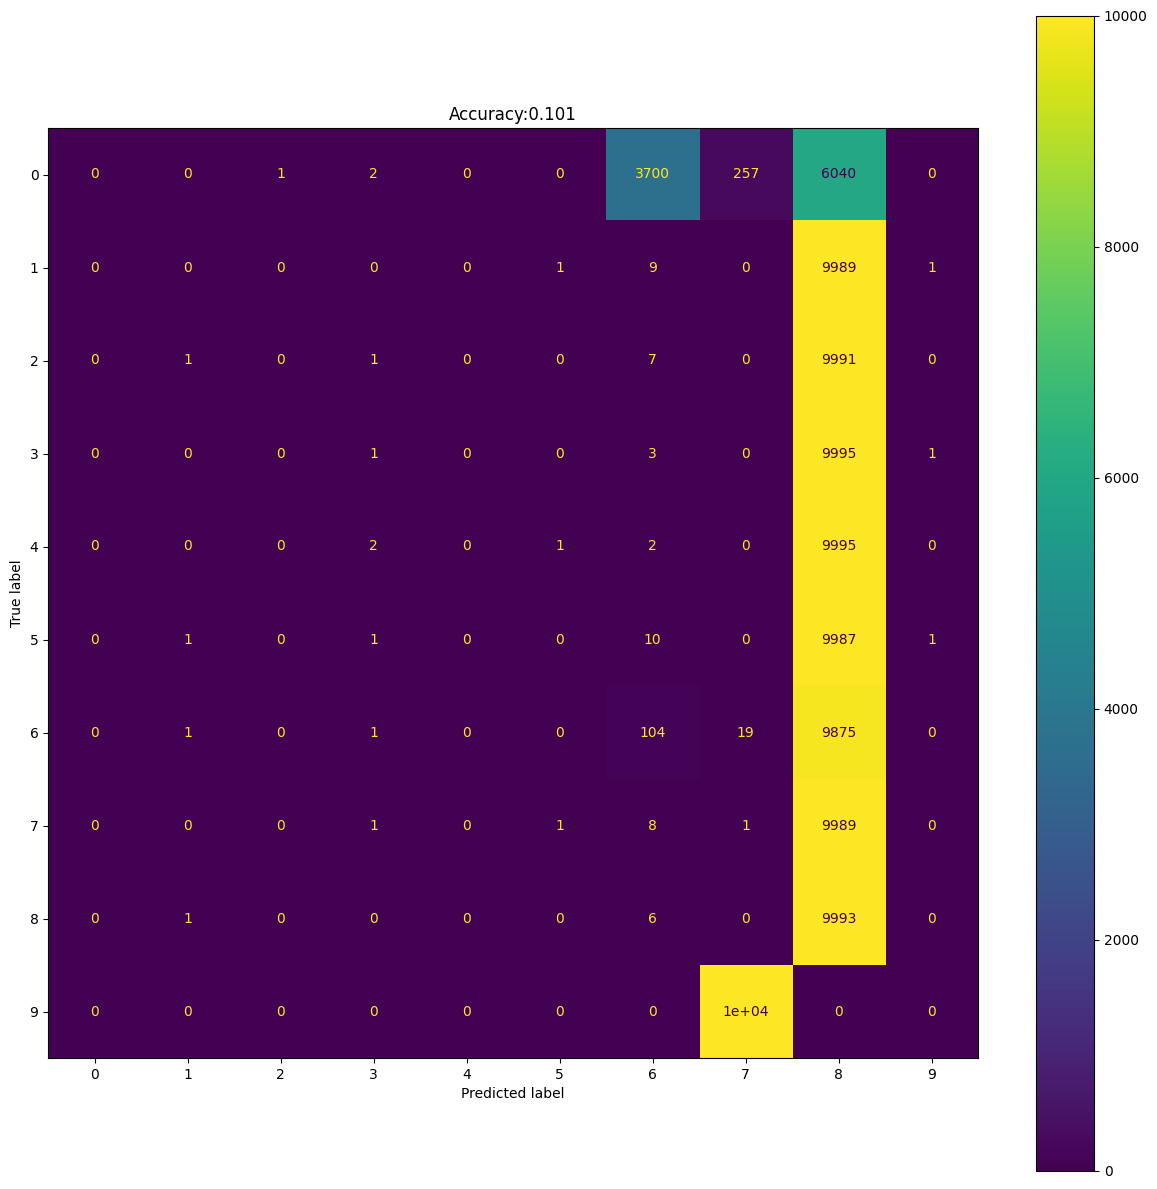

In [21]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_model_I to iPhone13_II Device

In [32]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

In [33]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 7.7091 - accuracy: 0.1050
test loss, test acc: [7.7091217041015625, 0.10499999672174454]


In [34]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 20s 6ms/step
[0 0 0 ... 1 6 6]
0


In [35]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[   5    0    0    0    0    0    0    0    0 9995]
 [   1    0    0    0   33    0    0   18 9948    0]
 [   1    1    6 7596 2289    0    1   89   17    0]
 [   0    0    0    0  668    4    0 2992 6336    0]
 [7515    0    0    0    0    0 2485    0    0    0]
 [   0   13   24   55 8133   85    1   76 1613    0]
 [   2  205 5352   10 2279    1    0    1 2150    0]
 [  27    0    0    0   14    0    0 8040 1919    0]
 [   4 1023   32    0    0    0 6577    0 2364    0]
 [   3 1206  778    0    0    0 7411    0  602    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.94      0.01      0.02     10000
           6       0.00      0.00      0.00     10000
           7       0.72      0.80   

Test Accuracy:0.105


Text(0.5, 1.0, 'Accuracy:0.105')

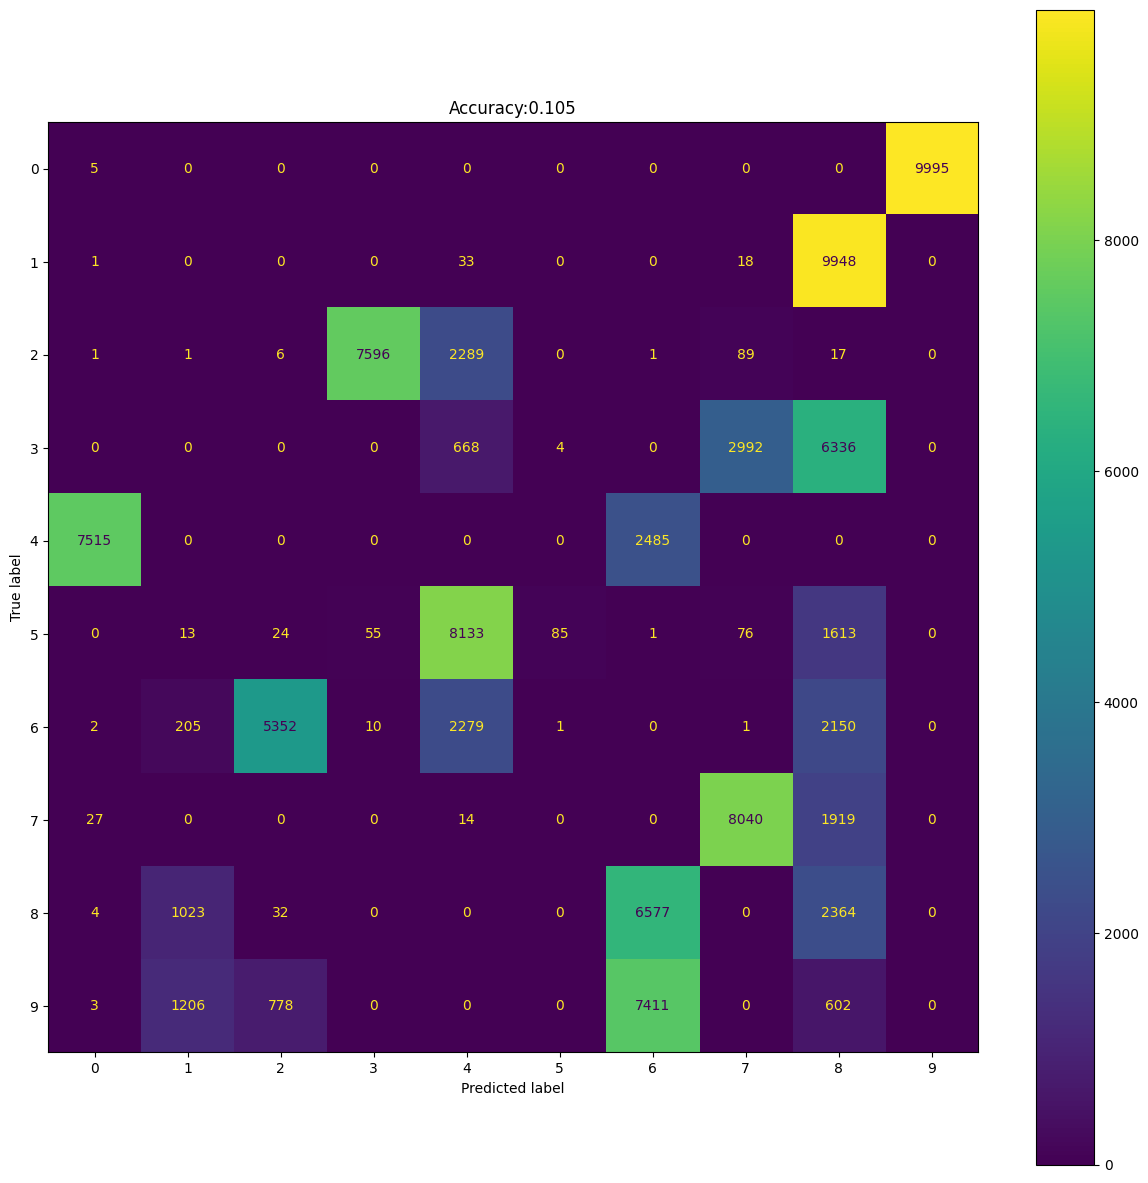

In [36]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_model_III to iPhone13_II Device

In [37]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")

In [38]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 16.4665 - accuracy: 0.1000
test loss, test acc: [16.466543197631836, 0.09995000064373016]


In [39]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 15s 5ms/step
[4 4 4 ... 8 8 8]
4


In [40]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[   3    3 5625    0    5    0   32 4331    1    0]
 [   0    0    1    0    0    1    7    0 9991    0]
 [   0    0    0    0    1    1    8    0 9990    0]
 [   0    0    0    0    0    0    7    3 9989    1]
 [   0    0    1    6    1    0 9361   49  582    0]
 [   0    0    0    1    0    0   12    0 9987    0]
 [   0    0    0    0    1    0   12    0 9987    0]
 [   9    0    0    1    9    1    1    1 9974    4]
 [   0    1    0    0    2    1   16    2 9977    1]
 [   0    1    0    1    0    0   20    0 9977    1]]
              precision    recall  f1-score   support

           0       0.25      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.05      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.00      0.00     10000
           7       0.00      0.00   

Test Accuracy:0.09995


Text(0.5, 1.0, 'Accuracy:0.100')

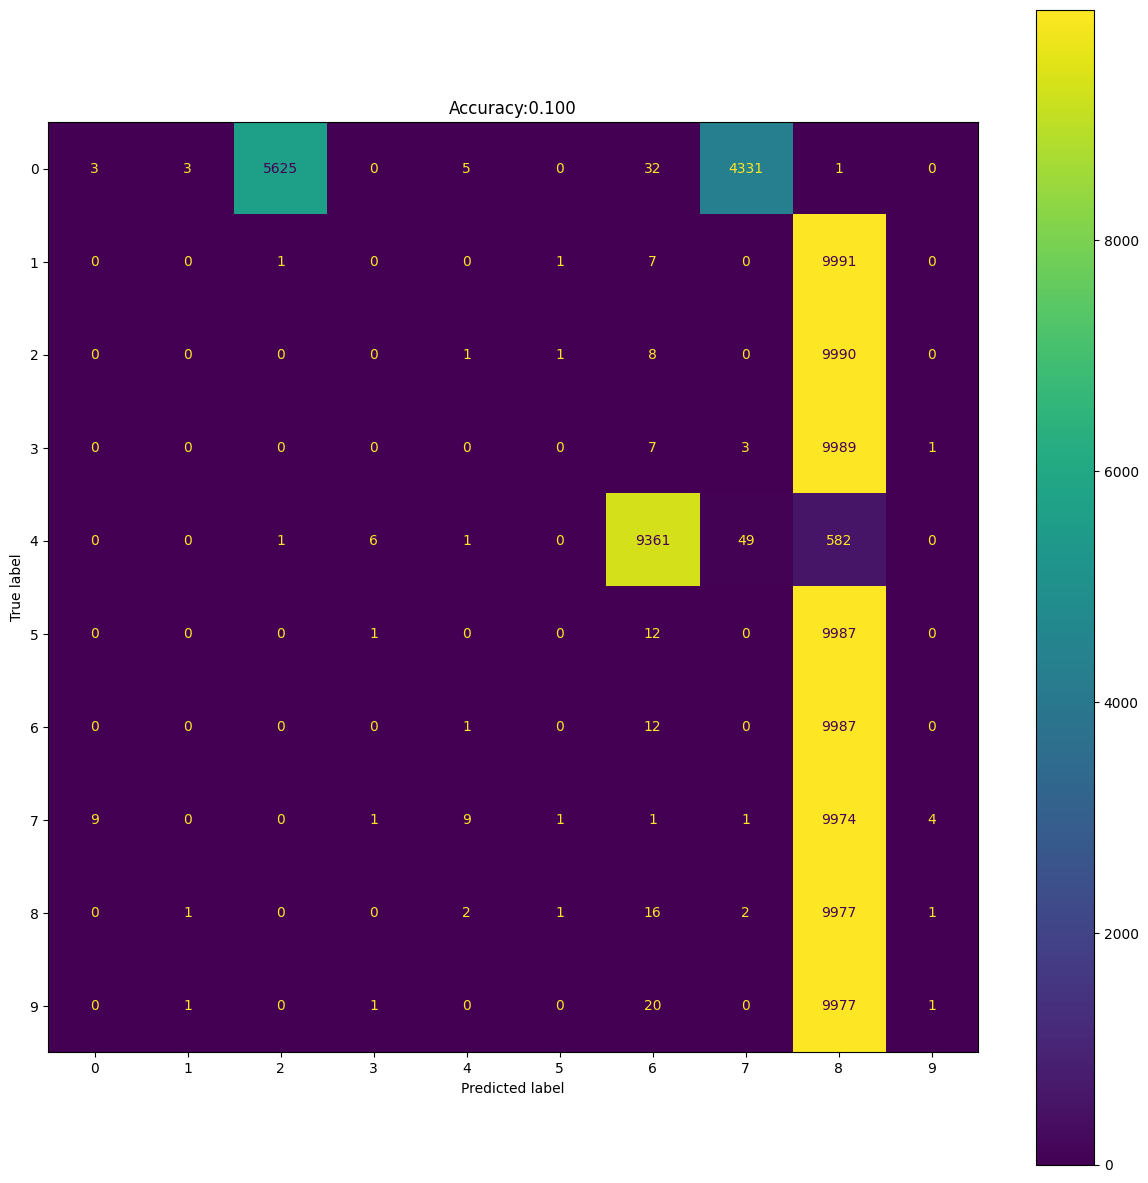

In [41]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_model_I to iPhone13_III Device

In [52]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

In [53]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 18s 6ms/step - loss: 18.1600 - accuracy: 0.2232
test loss, test acc: [18.160017013549805, 0.22316999733448029]


In [54]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 13s 4ms/step
[0 0 0 ... 0 0 0]
0


In [55]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [ 4459     0     0     0     0     0  5441     0   100     0]
 [ 6025     0     0     0     0     0  3118     0   857     0]
 [ 2754     1     0     0     0     0  5467     0  1778     0]
 [   42    28     0     0     0     0   731     0  9199     0]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.14      1.00      0.24     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00 

Test Accuracy:0.22317


Text(0.5, 1.0, 'Accuracy:0.223')

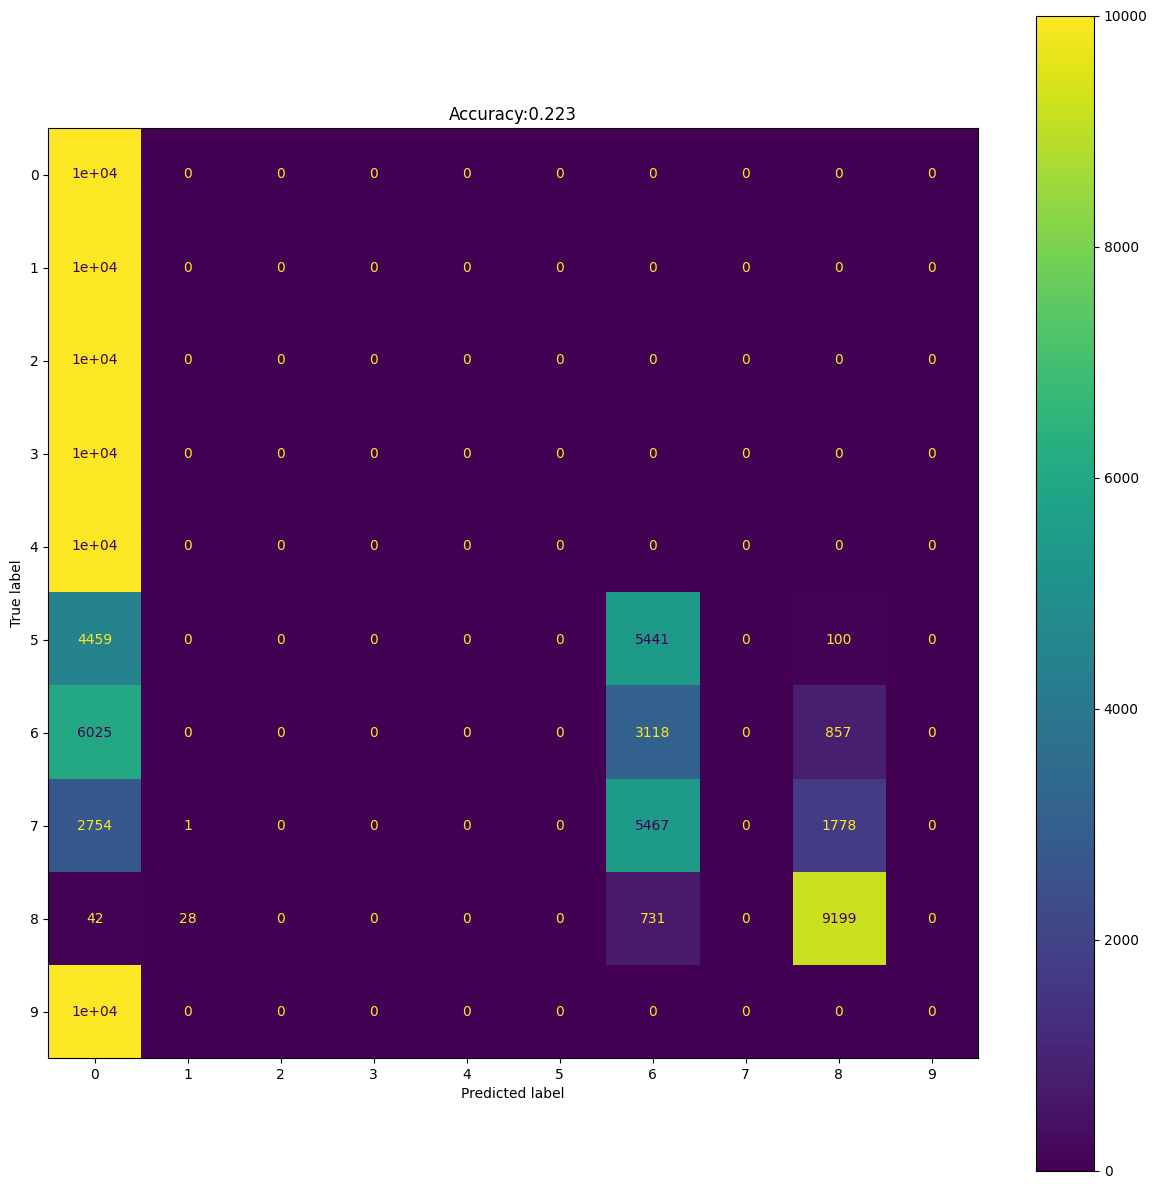

In [56]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_model_II to iPhone13_III Device

In [57]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")

In [58]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 22s 7ms/step - loss: 8.6074 - accuracy: 0.1063
test loss, test acc: [8.607431411743164, 0.10627000033855438]


In [59]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 20s 6ms/step
[4 4 4 ... 4 4 4]
4


In [60]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[  15    0    0    0 9985    0    0    0    0    0]
 [  54    0    0    0 9888    0    0   58    0    0]
 [   0    0    0    0 9990    0    0    1    1    8]
 [   0    0    0    0 9995    0    0    0    0    5]
 [   1   71    0    0 9461    0    0  124    0  343]
 [   0  342    0    0 1591    0    0    1    1 8065]
 [   0  733    0    0 8322    0    0    0  535  410]
 [   0 2760    0    0 5589    0    0    0 1600   51]
 [   0 7038    0    0  226    0    0    0  904 1832]
 [   1  111    0    0 9243    0    0  398    0  247]]
              precision    recall  f1-score   support

           0       0.21      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.13      0.95      0.22     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.00      0.00     10000
           7       0.00      0.00   

Test Accuracy:0.10627


Text(0.5, 1.0, 'Accuracy:0.106')

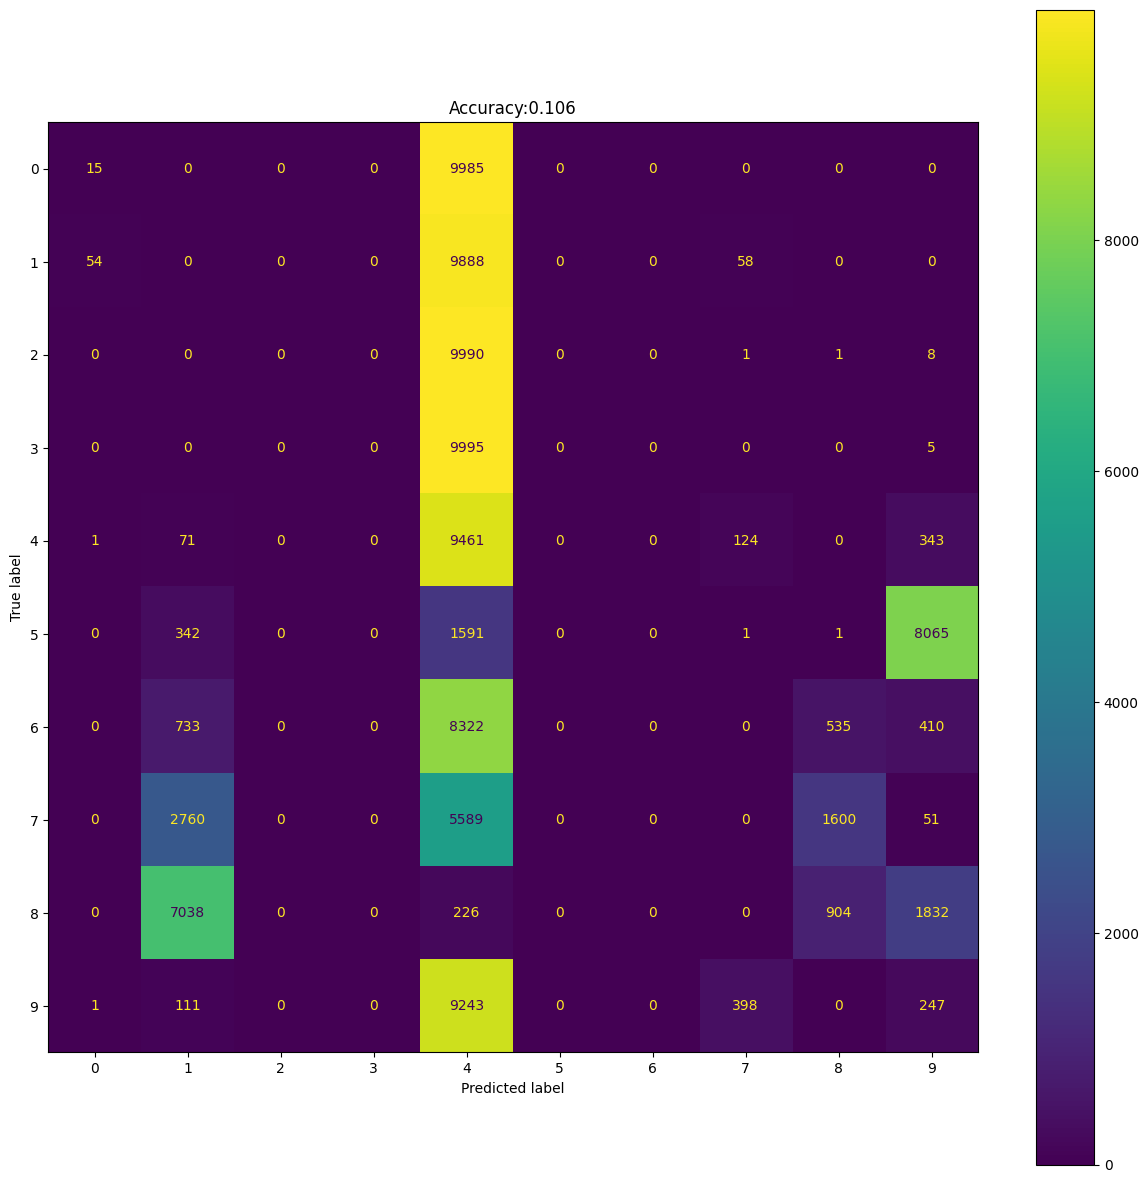

In [61]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')